In [61]:
#Import all dependency
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('drug200.csv') #Load the dataset to pandas
df.head()   #read first 5 instance

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [62]:
df.info()   #look the specification of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [63]:
#Normalization
df['Sex']           = df['Sex'].astype('category')
df['BP']            = df['BP'].astype('category')
df['Cholesterol']   = df['Cholesterol'].astype('category')
df['Na_to_K']       = df['Na_to_K'].astype('float')
df['Drug']          = df['Drug'].astype('category')

In [64]:
df.info()   #look specification again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    category
 2   BP           200 non-null    category
 3   Cholesterol  200 non-null    category
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 4.5 KB


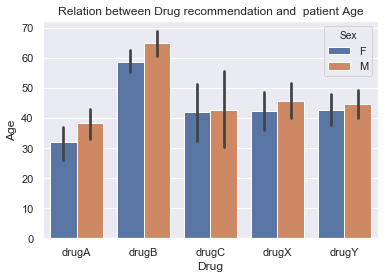

In [65]:
sns.set()   #Turn on the seaborn layout
sns.barplot('Drug','Age',hue='Sex',data=df) #Create barplot of Drug and Age seperated by sex 
plt.title('Relation between Drug recommendation and  patient Age')  #Title 
plt.show()  #Output plotting

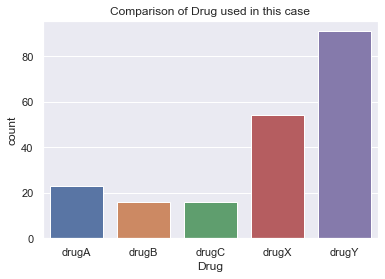

In [66]:
sns.countplot('Drug',data=df)   #Count drug that used
plt.title('Comparison of Drug used in this case')   #Title of plot
plt.show()  #Output the plotting

In [67]:
x                   = pd.DataFrame()    #Create new dataframe for training
x['Age']            = df['Age']
x['Sex']            = LabelEncoder().fit_transform(df['Sex'])   #Encode sex category to 0 for female and 1 for male
x['BP']             = LabelEncoder().fit_transform(df['BP'])    #Encode blood pressure category 
x['Cholesterol']    = LabelEncoder().fit_transform(df['Cholesterol'])   #Encode Cholesterol category
x['Na_to_K']        = df['Na_to_K']

In [68]:
x   #Output x dataframe

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [69]:
y           = pd.DataFrame()    #Crete y dataframe
y['Drug']   = df['Drug']

In [70]:
y   #Output Y

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [71]:
#Split between training data (70%) and validation data (30%)
x_train, x_test, y_train, y_test    = train_test_split(x,y,test_size=0.25,random_state=46,stratify=y)

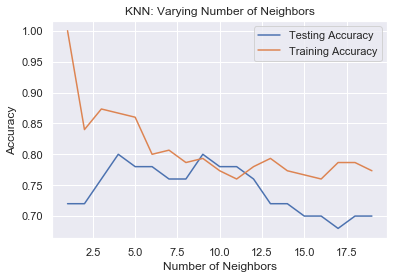

In [72]:
#Find the most accurate prediction based of n_neighbors

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')

    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [73]:
#Based of the data, we already know that  n_Neighbors= 5 is the best solution for this problem, so we use n_neighbors=5 to the final model

In [74]:
knn     = KNeighborsClassifier(n_neighbors=10,metric='manhattan')   #Create KNN Classifier 
knn.fit(x_train,y_train)    #Training the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [75]:
prediction = knn.predict(x_test) #Using Prediction
print(f'Prediction\t: {prediction}')    #Output the Prediction

Prediction	: ['drugB' 'drugX' 'drugY' 'drugB' 'drugA' 'drugX' 'drugA' 'drugB' 'drugY'
 'drugX' 'drugB' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugY' 'drugY'
 'drugY' 'drugY' 'drugX' 'drugY' 'drugY' 'drugY' 'drugY' 'drugA' 'drugY'
 'drugA' 'drugX' 'drugX' 'drugB' 'drugY' 'drugY' 'drugY' 'drugY' 'drugX'
 'drugB' 'drugA' 'drugB' 'drugY' 'drugX' 'drugY' 'drugY' 'drugY' 'drugC'
 'drugX' 'drugX' 'drugY' 'drugX' 'drugY']


In [76]:
knn.score(x_test,y_test)  #Output the predict score 1.0 = 100%

0.78

In [77]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [78]:
x.tail()

,Age,Sex,BP,Cholesterol,Na_to_K
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020
199,40,0,1,1,11.349


In [79]:
#Predict Data
knn.predict([[40,0,1,1,11.349]])

array(['drugX'], dtype=object)